## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import joblib

## Defining the customization settings

In [2]:
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.float_format',lambda x: '%.3f' % x) 

## Loading the dataset

In [3]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.000,121.000,16.370
1,1,Albania,Potatoes,1990,66667,1485.000,121.000,16.370
2,2,Albania,"Rice, paddy",1990,23333,1485.000,121.000,16.370
3,3,Albania,Sorghum,1990,12500,1485.000,121.000,16.370
4,4,Albania,Soybeans,1990,7000,1485.000,121.000,16.370


## Dropping the 'Unnamed: 0' column

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## Understanding the shape and structure of the dataset

In [5]:
df.shape

(28242, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000,28242.000,28242.000,28242.000,28242.000
mean,2001.544,77053.332,1149.056,37076.909,20.543
std,7.052,84956.613,709.812,59958.785,6.312
min,1990.000,50.000,51.000,0.040,1.300
25%,1995.000,19919.250,593.000,1702.000,16.703
50%,2001.000,38295.000,1083.000,17529.440,21.510
75%,2008.000,104676.750,1668.000,48687.880,26.000
max,2013.000,501412.000,3240.000,367778.000,30.650


In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

## Data Preprocessing

In [9]:
df.rename(columns={'average_rain_fall_mm_per_year': 'avg_annual_rainfall_mm'},inplace=True)

# Exploratory Data Analysis

## Univariate Analysis

Skewness of Year: 0.012242657930621922
Kurtosis of Year: -1.2718716891098538


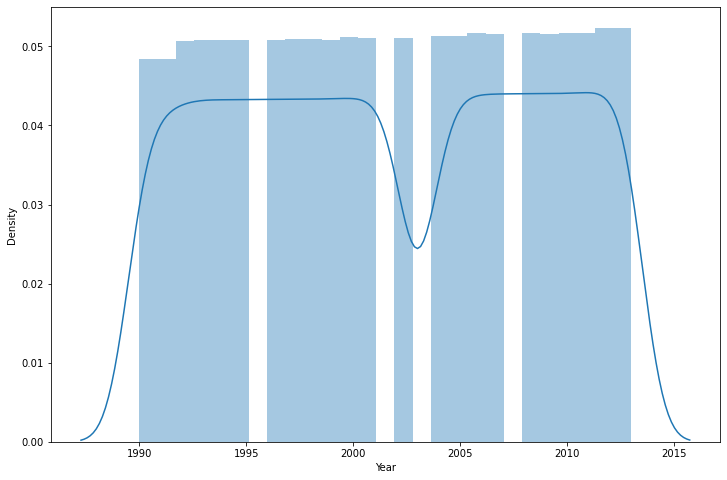

Skewness of hg/ha_yield: 1.7932285390815392
Kurtosis of hg/ha_yield: 3.066114424270603


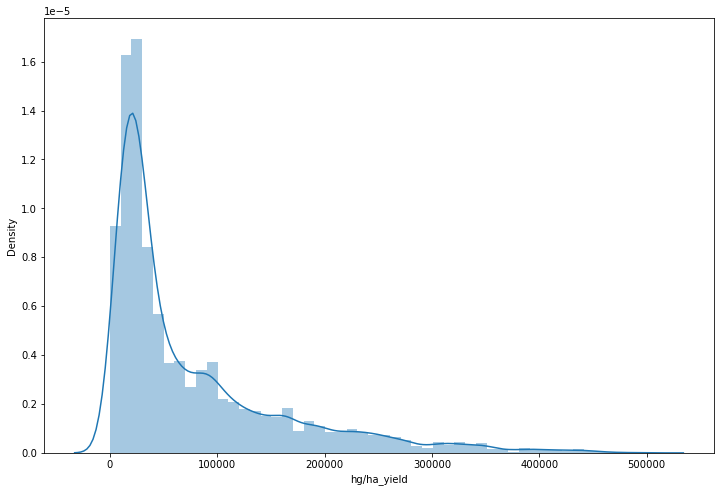

Skewness of avg_annual_rainfall_mm: 0.8538319647106902
Kurtosis of avg_annual_rainfall_mm: 0.30706001100675273


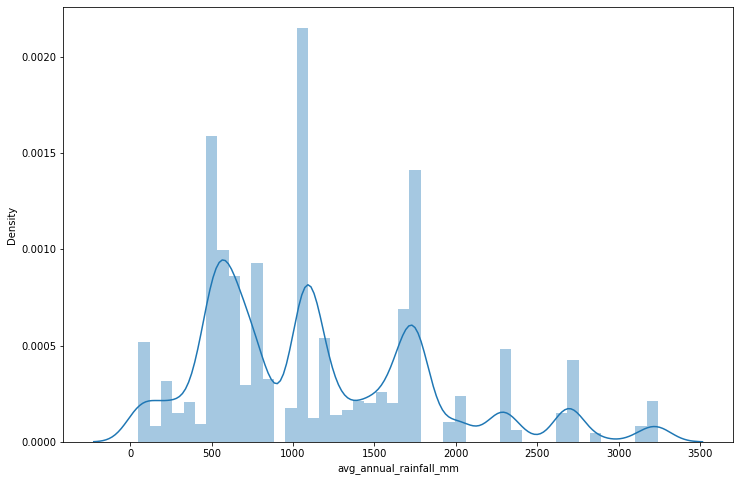

Skewness of pesticides_tonnes: 3.49028920684912
Kurtosis of pesticides_tonnes: 14.007274002274716


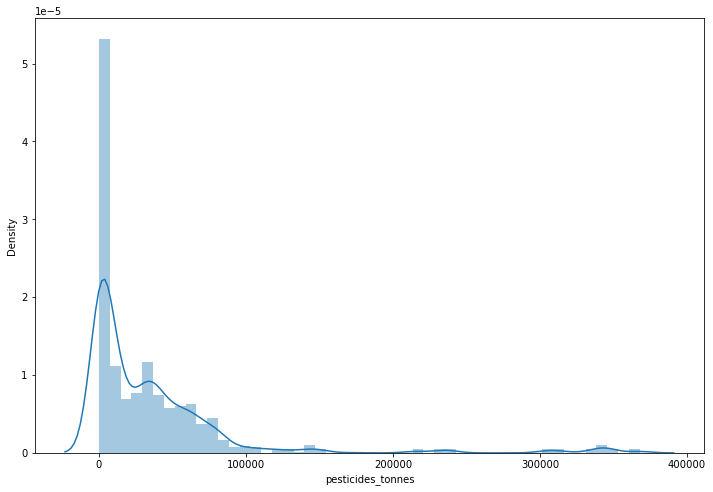

Skewness of avg_temp: -0.7415822956257284
Kurtosis of avg_temp: -0.4171842669357342


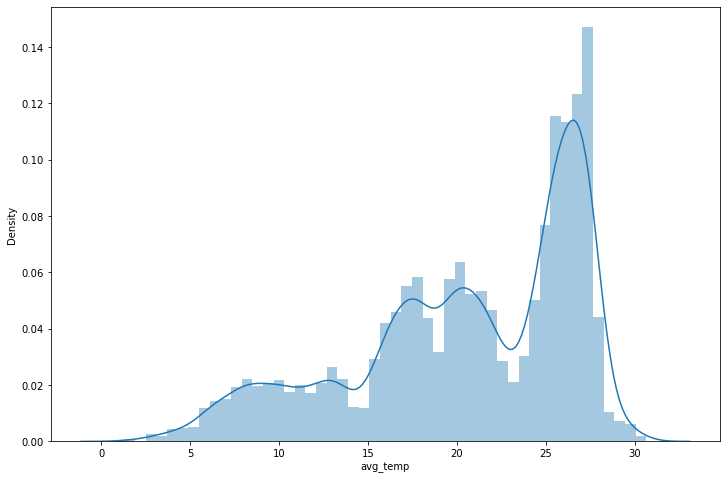

In [10]:
for col in df.columns:
    if df[col].dtypes != 'object':
        print("Skewness of {}:".format(col),df[col].skew())
        print("Kurtosis of {}:".format(col),df[col].kurt())
        sns.distplot(df[col])
        plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Year', ylabel='hg/ha_yield'>

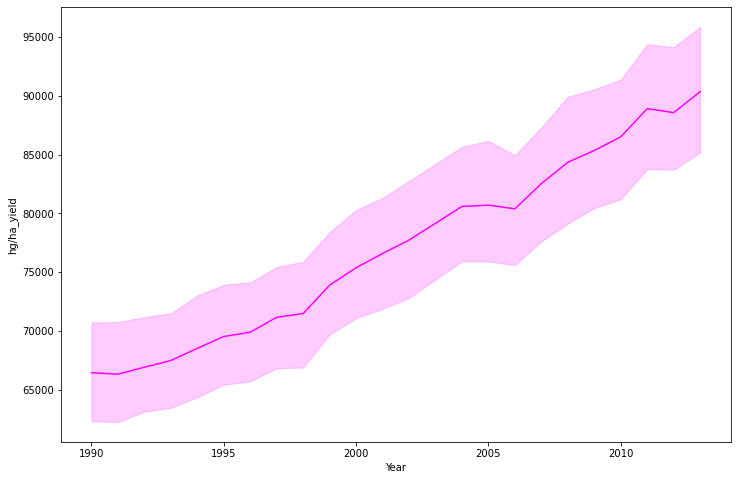

In [11]:
sns.lineplot(x='Year',y='hg/ha_yield',data=df,color='fuchsia')

The net area yield of the crops climbed dramatically from 1990, ultimately reaching a peak of about 90000 sq. feet by 2013.

In [12]:
highest_yield_areas = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).reset_index()[:10]
highest_yield_areas

,Area,hg/ha_yield
0,United Kingdom,240956.478
1,Belgium,216468.462
2,Denmark,214033.020
3,Netherlands,204151.203
4,Ireland,197913.696
5,New Zealand,191931.826
6,Sweden,187405.500
7,Bahrain,153237.552
8,Norway,146115.326
9,Switzerland,144960.283


<AxesSubplot:xlabel='Area', ylabel='hg/ha_yield'>

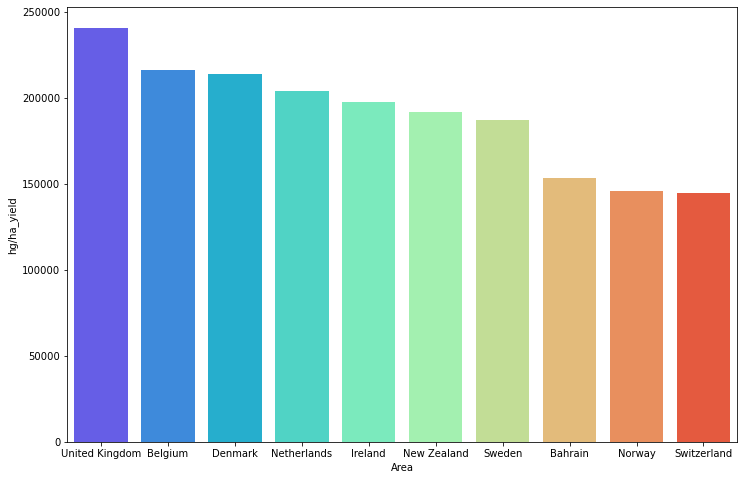

In [13]:
sns.barplot(x='Area',y='hg/ha_yield',data=highest_yield_areas,palette='rainbow')

At an average, United Kingdom has the highest crop area yield among all nations.

In [14]:
lowest_area_yields = df.groupby('Area')['hg/ha_yield'].mean().sort_values().reset_index()[:10]
lowest_area_yields

,Area,hg/ha_yield
0,Botswana,7353.922
1,Eritrea,18155.200
2,Central African Republic,26432.466
3,Mauritania,27738.143
4,Burkina Faso,33061.614
5,Madagascar,33171.321
6,Burundi,33966.889
7,Ecuador,34324.623
8,Angola,34893.677
9,Nepal,35771.417


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Botswana'),
  Text(1, 0, 'Eritrea'),
  Text(2, 0, 'Central African Republic'),
  Text(3, 0, 'Mauritania'),
  Text(4, 0, 'Burkina Faso'),
  Text(5, 0, 'Madagascar'),
  Text(6, 0, 'Burundi'),
  Text(7, 0, 'Ecuador'),
  Text(8, 0, 'Angola'),
  Text(9, 0, 'Nepal')])

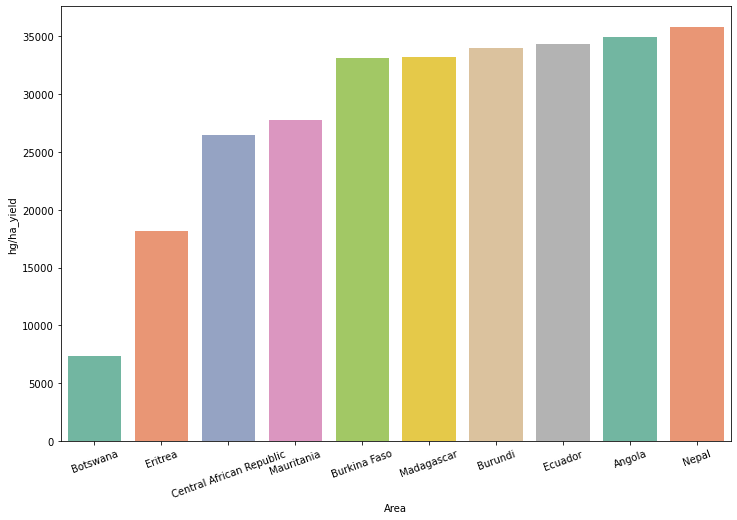

In [15]:
sns.barplot(x='Area',y='hg/ha_yield',data=lowest_area_yields,palette='Set2')
plt.xticks(rotation=20)

Botswana has the lowest crop area yield among all countries.

In [16]:
highest_rainfall_regions = df.groupby('Area')['avg_annual_rainfall_mm'].mean().sort_values(ascending=False).reset_index()[:10]
highest_rainfall_regions

,Area,avg_annual_rainfall_mm
0,Colombia,3240.000
1,Papua New Guinea,3142.000
2,Malaysia,2875.000
3,Indonesia,2702.000
4,Bangladesh,2666.000
5,Guyana,2387.000
6,Suriname,2331.000
7,Nicaragua,2280.000
8,Ecuador,2274.000
9,Jamaica,2051.000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Colombia'),
  Text(1, 0, 'Papua New Guinea'),
  Text(2, 0, 'Malaysia'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'Bangladesh'),
  Text(5, 0, 'Guyana'),
  Text(6, 0, 'Suriname'),
  Text(7, 0, 'Nicaragua'),
  Text(8, 0, 'Ecuador'),
  Text(9, 0, 'Jamaica')])

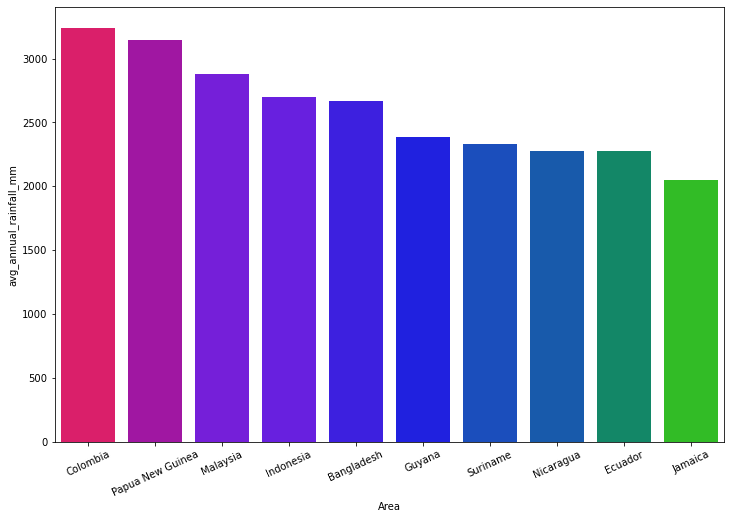

In [17]:
sns.barplot(x='Area',y='avg_annual_rainfall_mm',data=highest_rainfall_regions,palette='prism')
plt.xticks(rotation=25)

Colombia received the highest average amount of rainfall(in mm) among all regions worldwide.

In [18]:
least_rainfall_regions = df.groupby('Area')['avg_annual_rainfall_mm'].mean().sort_values().reset_index()[:10]
least_rainfall_regions

,Area,avg_annual_rainfall_mm
0,Egypt,51.000
1,Libya,56.000
2,Saudi Arabia,59.000
3,Qatar,74.000
4,Bahrain,83.000
5,Algeria,89.000
6,Mauritania,92.000
7,Niger,151.000
8,Tunisia,207.000
9,Iraq,216.000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Egypt'),
  Text(1, 0, 'Libya'),
  Text(2, 0, 'Saudi Arabia'),
  Text(3, 0, 'Qatar'),
  Text(4, 0, 'Bahrain'),
  Text(5, 0, 'Algeria'),
  Text(6, 0, 'Mauritania'),
  Text(7, 0, 'Niger'),
  Text(8, 0, 'Tunisia'),
  Text(9, 0, 'Iraq')])

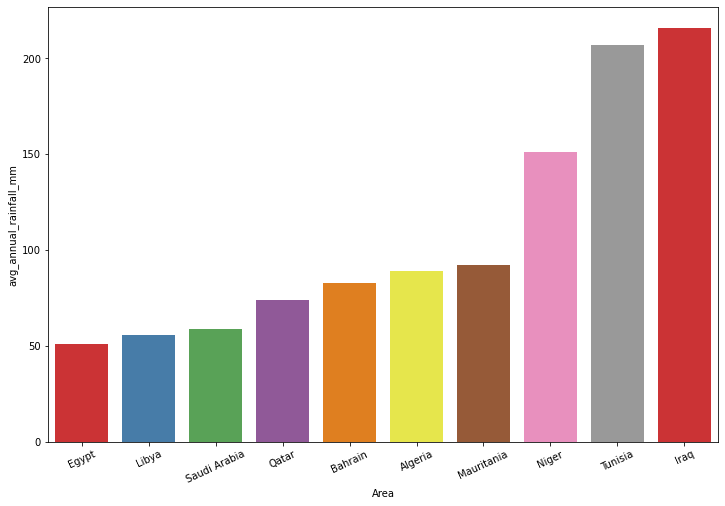

In [19]:
sns.barplot(x='Area',y='avg_annual_rainfall_mm',data=least_rainfall_regions,palette='Set1')
plt.xticks(rotation=25)

Egypt received the lowest amount of average rainfall among all nations around the world.

In [20]:
highest_temp_regions = df.groupby('Area')['avg_temp'].mean().sort_values(ascending=False).reset_index()[:10]
highest_temp_regions

,Area,avg_temp
0,Niger,29.719
1,Burkina Faso,28.737
2,Sudan,28.468
3,Qatar,27.913
4,Thailand,27.874
5,Mauritania,27.850
6,Mali,27.706
7,Guyana,27.346
8,Guinea,27.345
9,Jamaica,27.343


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Niger'),
  Text(1, 0, 'Burkina Faso'),
  Text(2, 0, 'Sudan'),
  Text(3, 0, 'Qatar'),
  Text(4, 0, 'Thailand'),
  Text(5, 0, 'Mauritania'),
  Text(6, 0, 'Mali'),
  Text(7, 0, 'Guyana'),
  Text(8, 0, 'Guinea'),
  Text(9, 0, 'Jamaica')])

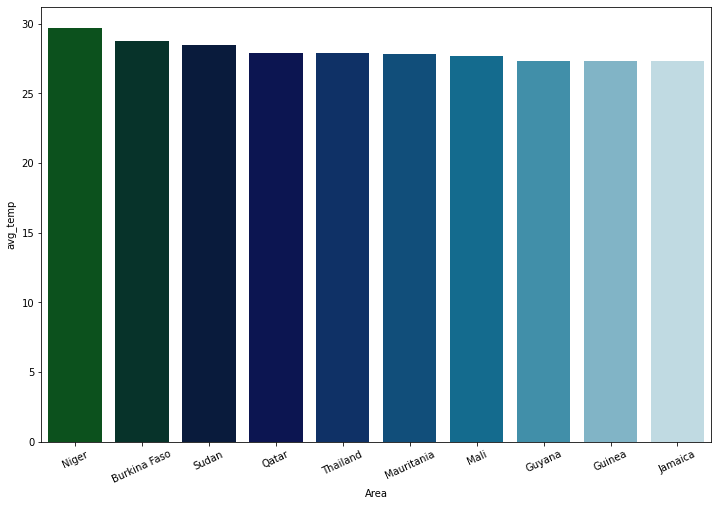

In [21]:
sns.barplot(x='Area',y='avg_temp',data=highest_temp_regions,palette='ocean')
plt.xticks(rotation=25)

Niger had the highest average temperature among all regions in the world.

In [22]:
lowest_temp_regions = df.groupby('Area')['avg_temp'].mean().sort_values().reset_index()[:10]
lowest_temp_regions

,Area,avg_temp
0,Norway,3.460
1,Kazakhstan,5.235
2,Finland,5.547
3,Estonia,6.175
4,Latvia,6.517
5,Belarus,6.735
6,Lithuania,6.740
7,Canada,7.192
8,Sweden,7.568
9,Switzerland,7.906


<AxesSubplot:xlabel='Area', ylabel='avg_temp'>

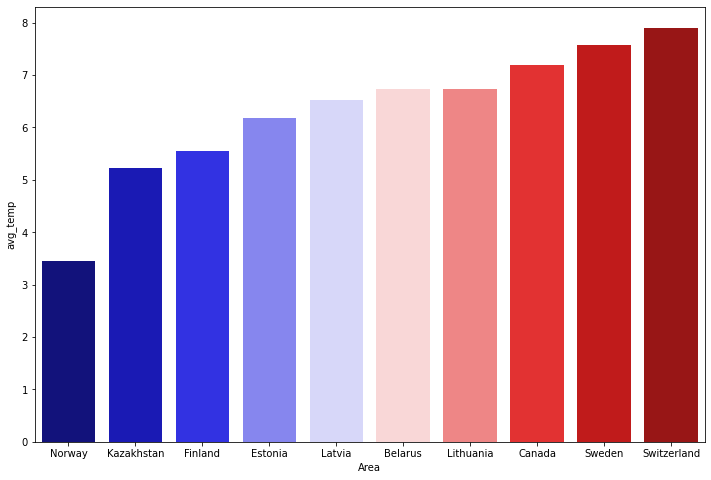

In [23]:
sns.barplot(x='Area',y='avg_temp',data=lowest_temp_regions,palette='seismic')

Norway had the lowest average temperature among all countries across the globe.

<AxesSubplot:xlabel='Year', ylabel='avg_annual_rainfall_mm'>

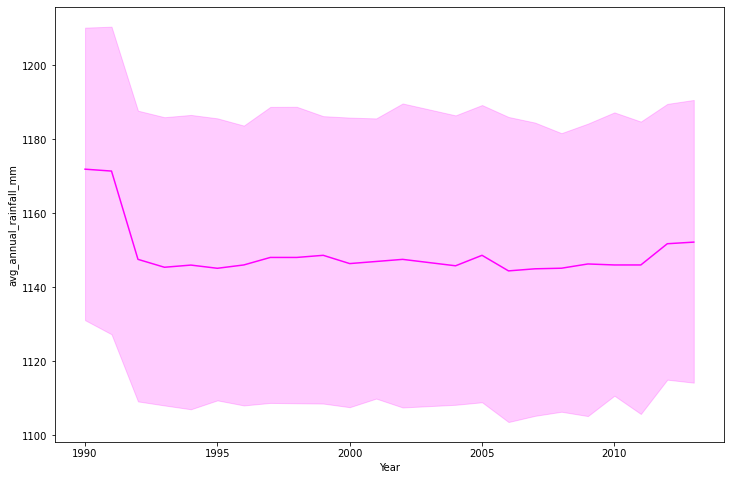

In [24]:
sns.lineplot(x='Year',y='avg_annual_rainfall_mm',data=df,color='magenta')

The average rainfall descended abruptly from 1172 during 1990 all the way down to 1148 in 1992 and then followed a nearly constant trend with slight fluctuations during some years such as in 2005, eventually attaining a value of approximately 1150 by 2013.

In [25]:
highest_yield_items = df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).reset_index()[:10]
highest_yield_items

,Item,hg/ha_yield
0,Potatoes,199801.550
1,Cassava,150479.467
2,Sweet potatoes,119057.794
3,Yams,114140.346
4,Plantains and others,106041.320
5,"Rice, paddy",40730.435
6,Maize,36310.071
7,Wheat,30116.268
8,Sorghum,18635.777
9,Soybeans,16731.093


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Potatoes'),
  Text(1, 0, 'Cassava'),
  Text(2, 0, 'Sweet potatoes'),
  Text(3, 0, 'Yams'),
  Text(4, 0, 'Plantains and others'),
  Text(5, 0, 'Rice, paddy'),
  Text(6, 0, 'Maize'),
  Text(7, 0, 'Wheat'),
  Text(8, 0, 'Sorghum'),
  Text(9, 0, 'Soybeans')])

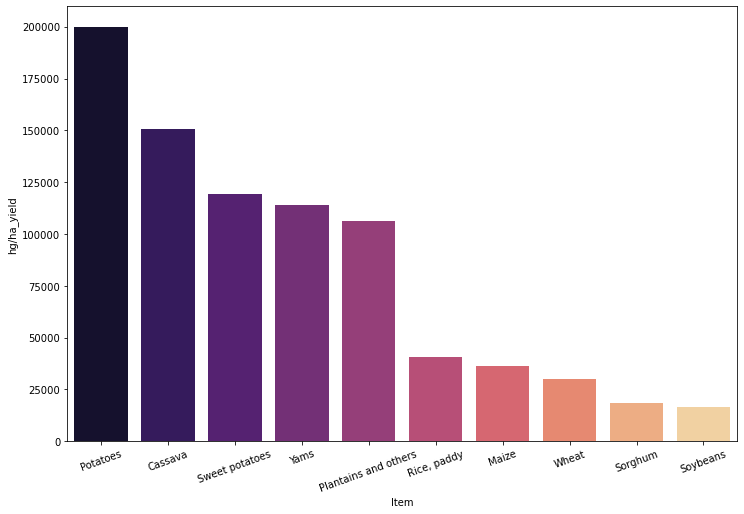

In [26]:
sns.barplot(x='Item',y='hg/ha_yield',data=highest_yield_items,palette='magma')
plt.xticks(rotation=20)

Potatoes have the highest yield among all available crops.

In [27]:
lowest_yield_items = df.groupby('Item')['hg/ha_yield'].mean().sort_values().reset_index()[:10]
lowest_yield_items

,Item,hg/ha_yield
0,Soybeans,16731.093
1,Sorghum,18635.777
2,Wheat,30116.268
3,Maize,36310.071
4,"Rice, paddy",40730.435
5,Plantains and others,106041.320
6,Yams,114140.346
7,Sweet potatoes,119057.794
8,Cassava,150479.467
9,Potatoes,199801.550


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Soybeans'),
  Text(1, 0, 'Sorghum'),
  Text(2, 0, 'Wheat'),
  Text(3, 0, 'Maize'),
  Text(4, 0, 'Rice, paddy'),
  Text(5, 0, 'Plantains and others'),
  Text(6, 0, 'Yams'),
  Text(7, 0, 'Sweet potatoes'),
  Text(8, 0, 'Cassava'),
  Text(9, 0, 'Potatoes')])

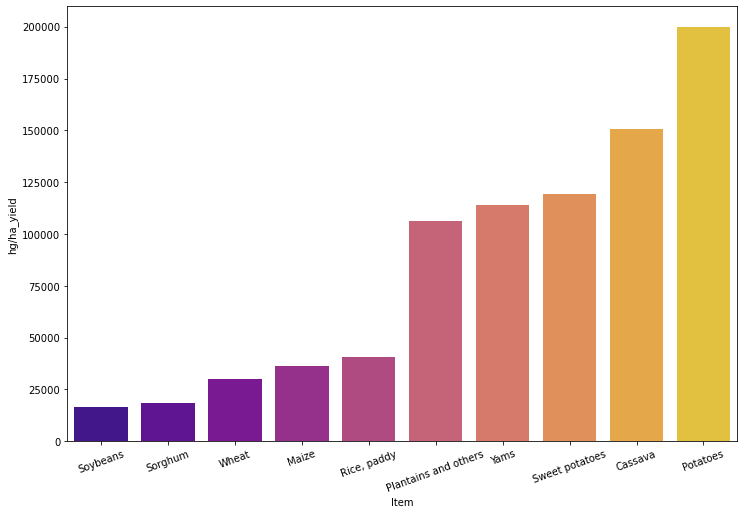

In [28]:
sns.barplot(x='Item',y='hg/ha_yield',data=lowest_yield_items,palette='plasma')
plt.xticks(rotation=20)

Soyabeans have the lowest yield among all the crops.

In [29]:
highest_pest_crops = df.groupby('Item')['pesticides_tonnes'].mean().sort_values(ascending=False).reset_index()[:10]
highest_pest_crops

,Item,pesticides_tonnes
0,Yams,71945.976
1,Cassava,44181.307
2,Soybeans,40752.555
3,Sweet potatoes,39448.290
4,"Rice, paddy",36942.216
5,Sorghum,36742.458
6,Wheat,35453.213
7,Maize,32765.983
8,Potatoes,32152.516
9,Plantains and others,7931.010


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Yams'),
  Text(1, 0, 'Cassava'),
  Text(2, 0, 'Soybeans'),
  Text(3, 0, 'Sweet potatoes'),
  Text(4, 0, 'Rice, paddy'),
  Text(5, 0, 'Sorghum'),
  Text(6, 0, 'Wheat'),
  Text(7, 0, 'Maize'),
  Text(8, 0, 'Potatoes'),
  Text(9, 0, 'Plantains and others')])

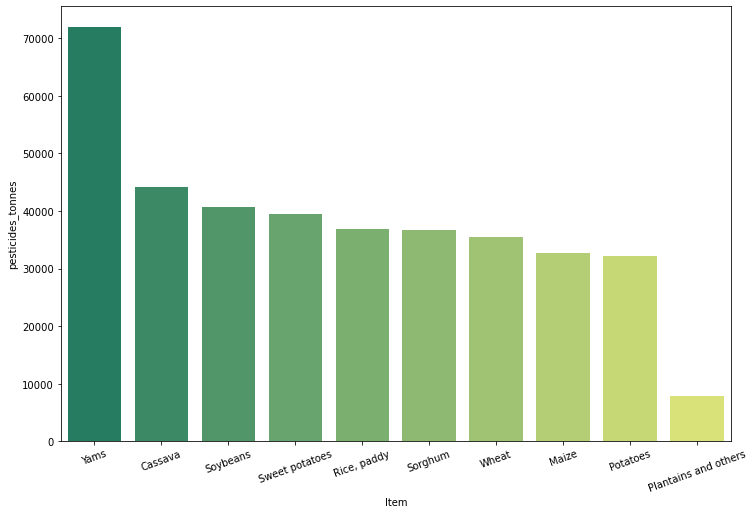

In [30]:
sns.barplot(x='Item',y='pesticides_tonnes',data=highest_pest_crops,palette='summer')
plt.xticks(rotation=20)

The highest concentration of pesticides were sprayed on yams.

In [31]:
lowest_pesticide_crops = df.groupby('Item')['pesticides_tonnes'].mean().sort_values().reset_index()[:10]
lowest_pesticide_crops

,Item,pesticides_tonnes
0,Plantains and others,7931.010
1,Potatoes,32152.516
2,Maize,32765.983
3,Wheat,35453.213
4,Sorghum,36742.458
5,"Rice, paddy",36942.216
6,Sweet potatoes,39448.290
7,Soybeans,40752.555
8,Cassava,44181.307
9,Yams,71945.976


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Plantains and others'),
  Text(1, 0, 'Potatoes'),
  Text(2, 0, 'Maize'),
  Text(3, 0, 'Wheat'),
  Text(4, 0, 'Sorghum'),
  Text(5, 0, 'Rice, paddy'),
  Text(6, 0, 'Sweet potatoes'),
  Text(7, 0, 'Soybeans'),
  Text(8, 0, 'Cassava'),
  Text(9, 0, 'Yams')])

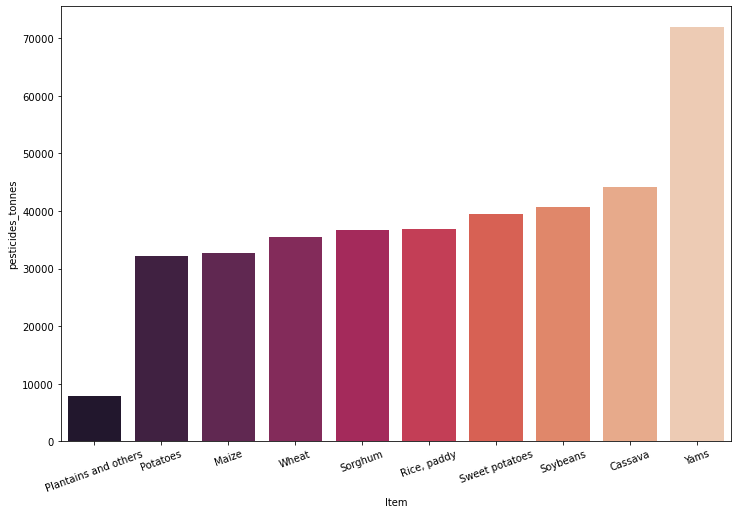

In [32]:
sns.barplot(x='Item',y='pesticides_tonnes',data=lowest_pesticide_crops,palette='rocket')
plt.xticks(rotation=20)

The lowest amount of pesticides were applied on plantains and others.

## Multivariate Analysis

<AxesSubplot:>

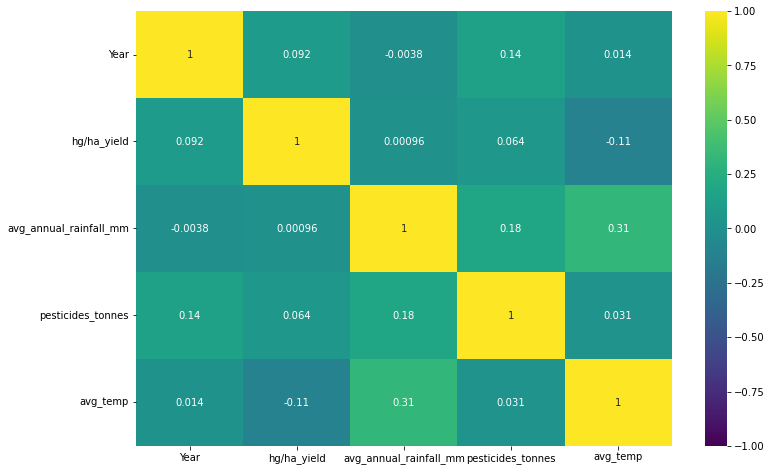

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

There is a very mild positive correlation between average annual rainfall(in mm) and average temperature.

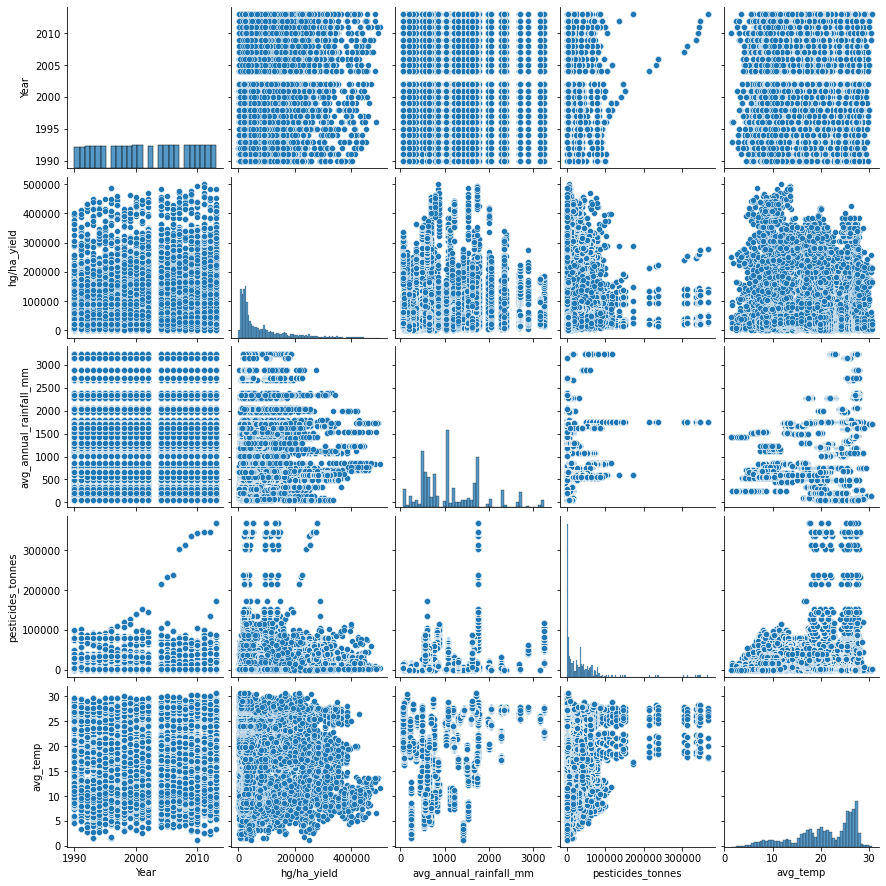

In [34]:
sns.pairplot(df)

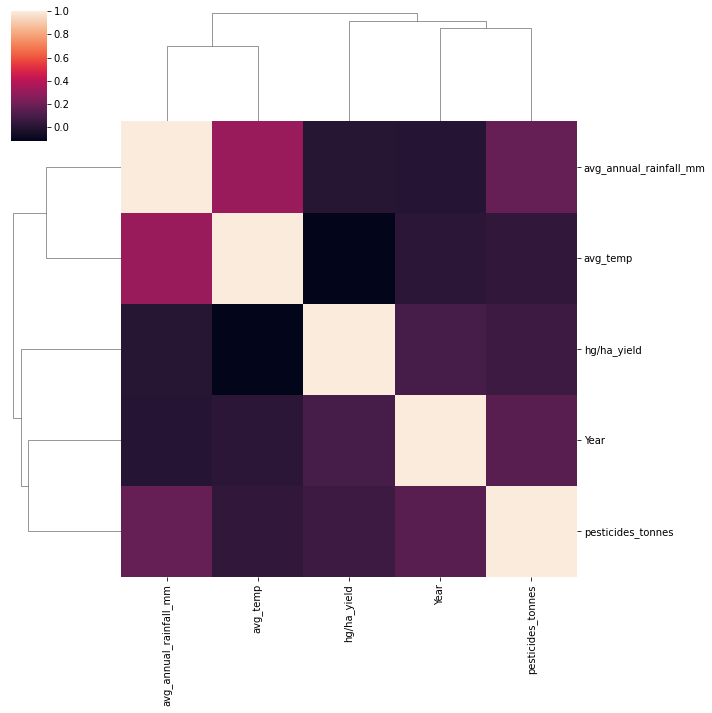

In [35]:
sns.clustermap(df.corr())

<AxesSubplot:xlabel='pesticides_tonnes'>

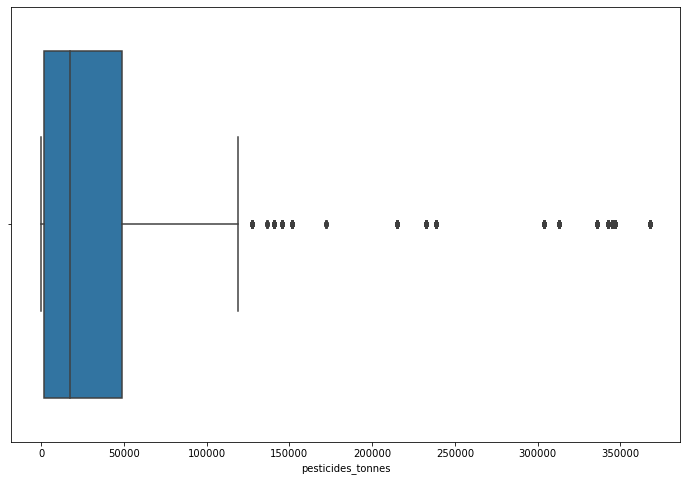

In [36]:
sns.boxplot(df.pesticides_tonnes)

## Imputation of Outliers

In [37]:
for col in df.columns:
    if df[col].dtypes != 'object':
        Q1, Q3 = df[col].quantile([0.25,0.75])
        UCL = Q3 + 1.5 * (Q3-Q1)
        df[col] = df[col].map(lambda x: UCL if x > UCL else x)

## Categorical Encoding

In [38]:
le = LabelEncoder()
df.Item = le.fit_transform(df.Item)

In [39]:
le.classes_,le.transform(le.classes_)

(array(['Cassava', 'Maize', 'Plantains and others', 'Potatoes',
        'Rice, paddy', 'Sorghum', 'Soybeans', 'Sweet potatoes', 'Wheat',
        'Yams'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [40]:
df.Area = le.fit_transform(df.Area)
le.classes_, le.transform(le.classes_)

(array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
        'Central African Republic', 'Chile', 'Colombia', 'Croatia',
        'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
        'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
        'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
        'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
        'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
        'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
        'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
        'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
        'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
        'Pakistan', 'Papua New Guinea'

## Feature Scaling

In [41]:
scaler = StandardScaler()
features = df.columns
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=features)
df.head()

,Area,Item,Year,hg/ha_yield,avg_annual_rainfall_mm,pesticides_tonnes,avg_temp
0,-1.734,-1.298,-1.637,-0.502,0.473,-0.899,-0.661
1,-1.734,-0.539,-1.637,-0.073,0.473,-0.899,-0.661
2,-1.734,-0.160,-1.637,-0.692,0.473,-0.899,-0.661
3,-1.734,0.220,-1.637,-0.847,0.473,-0.899,-0.661
4,-1.734,0.599,-1.637,-0.925,0.473,-0.899,-0.661


# Model Training & Evaluation

## Dividing the dataset into training and testing sets

In [42]:
X = df.drop('hg/ha_yield',axis=1)
y = df['hg/ha_yield']

## Polynomial Regression

In [43]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)

PolynomialFeatures(degree=4)

In [44]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly,y,test_size=0.35,random_state=1)

In [45]:
lr = LinearRegression()
lr.fit(X_poly_train,y_poly_train)

LinearRegression()

In [46]:
lr.score(X_poly_test,y_poly_test)

0.29996241544321167

## Dividing the dataset into training and testing sets for usage of other models

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=1)

### K Neighbors Regressor

In [48]:
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [49]:
knr.score(X_test,y_test)

0.9465854069505748

### Support Vector Regressor

In [50]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [51]:
svr.score(X_test,y_test)

0.2205451001359099

### Decision Tree Regressor

In [52]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [53]:
dtree.score(X_test,y_test)

0.9723199032331848

### Random Forest Regressor

In [54]:
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)

RandomForestRegressor()

In [55]:
rfc.score(X_test,y_test)

0.982797683507213

### XG Boost Regressor

In [56]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
xgb.score(X_test,y_test)

0.9701333425264123

### Gradient Boosting Regressor

In [58]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [59]:
gbr.score(X_test,y_test)

0.8512289714748442

## Conclusion

In [60]:
print("Performance of various ML models used:")
print("Prediction Accuracy of Polynomial Regression:",str(np.round(lr.score(X_poly_test,y_poly_test)*100,2)) + '%')
print("Prediction Accuracy of K Neighbors Regressor:",str(np.round(knr.score(X_test,y_test)*100,2)) + '%')
print("Prediction Accuracy of Support Vector Regressor:",str(np.round(svr.score(X_test,y_test)*100,2)) + '%')
print("Prediction Accuracy of Decision Tree Regressor:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Prediction Accuracy of Random Forest Regressor:",str(np.round(rfc.score(X_test,y_test)*100,2)) + '%')
print("Prediction Accuracy of XG Boost Regressor:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Prediction Accuracy of Gradient Boosting Regressor:",str(np.round(gbr.score(X_test,y_test)*100,2)) + '%')

Performance of various ML models used:
Prediction Accuracy of Polynomial Regression: 30.0%
Prediction Accuracy of K Neighbors Regressor: 94.66%
Prediction Accuracy of Support Vector Regressor: 22.05%
Prediction Accuracy of Decision Tree Regressor: 97.23%
Prediction Accuracy of Random Forest Regressor: 98.28%
Prediction Accuracy of XG Boost Regressor: 97.01%
Prediction Accuracy of Gradient Boosting Regressor: 85.12%


Random Forest Regressor had the best performance among all models, possessing a prediction accuracy of almost 98.3%, closely followed by Decision Tree Regressor possessing an accuracy score of a little more than 97%, XGBoost Regressor having an accuracy of just over 97%, K Neighbors Regressor having an accuracy of about 94.66% and finally Gradient Boosting Regressor which possesses an accuracy score of a little more than 85%. However, the underfitting models in this case are Polynomial Regression and Support Vector Regressor which produced a worst fit, having poor prediction accuracies of 30% and 22% respectively.

## Saving the model for future use

In [61]:
joblib.dump(rfc,'model.pkl')

['model.pkl']

In [62]:
model = joblib.load('model.pkl')
model

RandomForestRegressor()